<a href="https://colab.research.google.com/github/naga-sk/DataScienceTraining-Assignments/blob/main/hackathon2_big_mart/Big_Mart_sales_prediction_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [137]:
#df_train = pd.read_csv("https://raw.githubusercontent.com/naga-sk/DataScienceTraining-Assignments/main/hackathon2_big_mart/train_big_mart.csv", index_col=["Item_Identifier", "Outlet_Identifier"])
df_train = pd.read_csv("https://raw.githubusercontent.com/naga-sk/DataScienceTraining-Assignments/main/hackathon2_big_mart/train_big_mart.csv")

In [138]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [139]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [140]:
df_train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [141]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [142]:
df_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [143]:
# Check the values of all unique categorical values to see if there is an opportunity to consolidate unique values
# - Item_Type has 16 unique values. Can we reduce this?
# Fill missing values
# - Numerical - 
# - Item_Weight is missing 1463 values. 
# --- Fill Strategy - Correlate with Item_Type, Item_MRP and potentially Item_Fat_Content, and apply mean
# - Categorical - 
# - Outlet_Size is missing 2410 values. 
# --- Fill Strategy - Correlate with Outlet_Location_Type and Outlet_Type
# Probably not needed for Linear Regression. Check for skewed disribution and fix skew. 

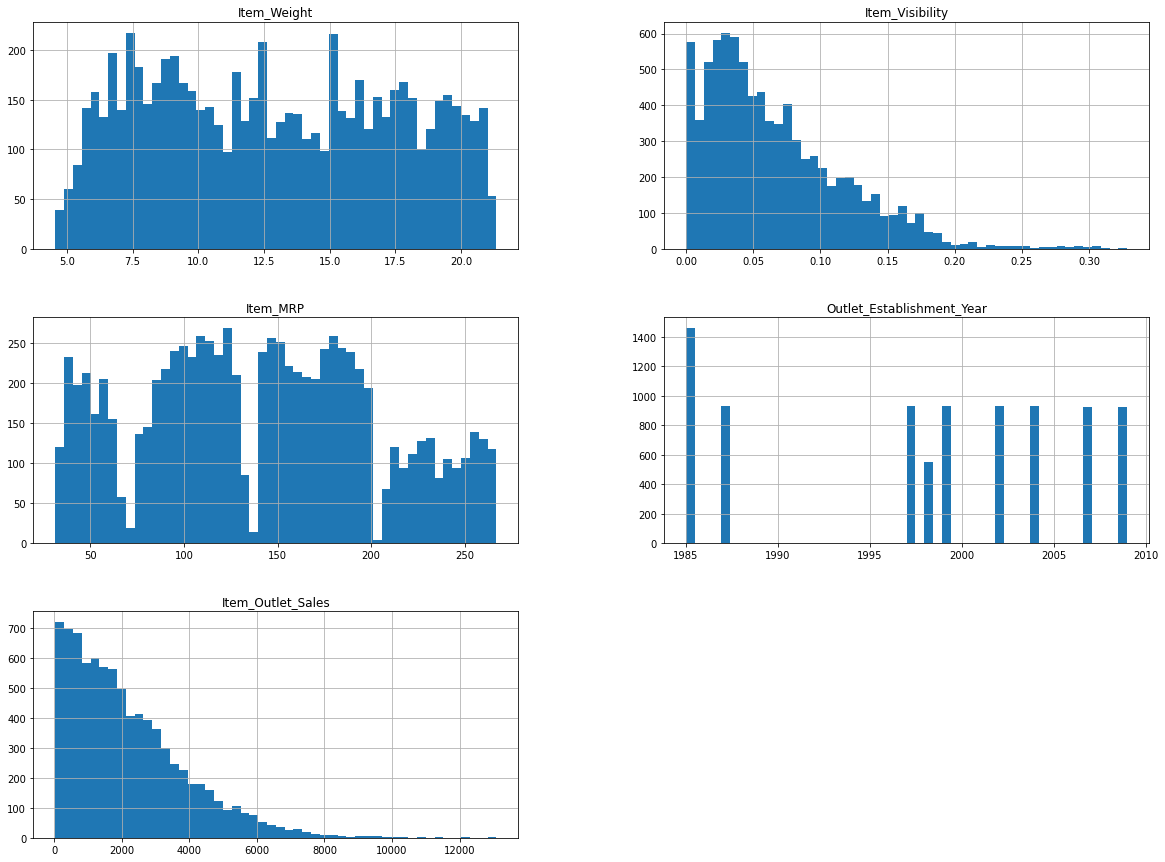

In [144]:
df_train.hist(bins = 50, figsize=(20,15))
plt.show()

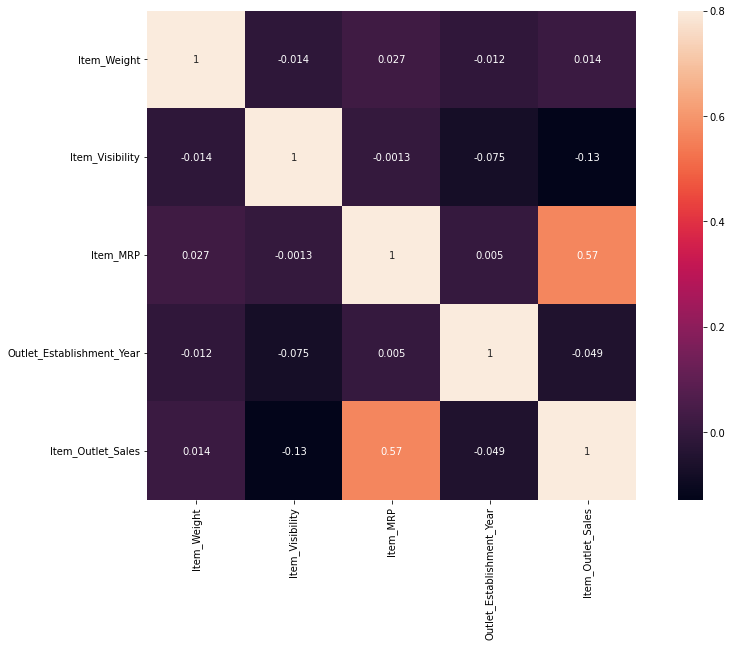

In [145]:
correl=df_train.corr()
ax=plt.subplots(figsize=(15,9))
sns.heatmap(correl,vmax=0.8,square=True, annot=True)

In [146]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [147]:
df_train.Item_Fat_Content.value_counts()
# Duplicate values here

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [148]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [149]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [150]:
df_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [151]:
df_train.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']).agg({'Outlet_Size': ['count']})

Outlet_Size
                                                         count
Outlet_Type       Outlet_Location_Type Outlet_Size            
Grocery Store     Tier 1               Small               528
Supermarket Type1 Tier 1               Medium              930
                                       Small               930
                  Tier 2               Small               930
                  Tier 3               High                932
Supermarket Type2 Tier 3               Medium              928
Supermarket Type3 Tier 3               Medium              935

In [152]:
df_train.groupby(['Outlet_Identifier','Outlet_Type', 'Outlet_Location_Type']).agg({'Outlet_Size': ['count']})

,,,Outlet_Size
,,,count
Outlet_Identifier,Outlet_Type,Outlet_Location_Type,
OUT010,Grocery Store,Tier 3,0
OUT013,Supermarket Type1,Tier 3,932
OUT017,Supermarket Type1,Tier 2,0
OUT018,Supermarket Type2,Tier 3,928
OUT019,Grocery Store,Tier 1,528
OUT027,Supermarket Type3,Tier 3,935
OUT035,Supermarket Type1,Tier 2,930
OUT045,Supermarket Type1,Tier 2,0


In [153]:
df_train.groupby(['Outlet_Identifier','Outlet_Type', 'Outlet_Location_Type','Outlet_Size']).agg({'Outlet_Size': ['count']})

,,,,Outlet_Size
,,,,count
Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Size,
OUT013,Supermarket Type1,Tier 3,High,932
OUT018,Supermarket Type2,Tier 3,Medium,928
OUT019,Grocery Store,Tier 1,Small,528
OUT027,Supermarket Type3,Tier 3,Medium,935
OUT035,Supermarket Type1,Tier 2,Small,930
OUT046,Supermarket Type1,Tier 1,Small,930
OUT049,Supermarket Type1,Tier 1,Medium,930


In [154]:
def fix_data(df):
  df['Item_Type_Combined']=df.Item_Identifier.apply(lambda x:x[0:2])
  df['Item_Type_Combined'].value_counts()

  # Aggregate and label encode <Item_Fat_Content>
  df.loc[df['Item_Type_Combined']=='NC','Item_Fat_Content']=0
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'LF','low fat'], 1)
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Regular', 'reg'], 2)  

  # Derive outlet_age from outlet_establishment_year
  df['Outlet_Age']=2022-df['Outlet_Establishment_Year']
  df.drop('Outlet_Establishment_Year', axis=1, inplace=True)

  # Label encode outlet_size, outlet_type and outlet_location_type using a map
  df.Outlet_Size=df.Outlet_Size.map({'Small':0,'Medium':1,'High':2})
  df.Outlet_Type=df.Outlet_Type.map({'Grocery Store':0,'Supermarket Type1':1, 'Supermarket Type2':2,'Supermarket Type3':3})
  df.Outlet_Location_Type=df.Outlet_Location_Type.map({'Tier 1':1,'Tier 2':2,'Tier 3':3})
  

  # Since I am not able to decide on an optimum method to fill NAs for outlets, 
  # I will individually fill based on the knowledge off Outlet ID and Outlet Type above

  df.loc[df["Outlet_Identifier"] == 'OUT010', 'Outlet_Size'] = 0
  df.loc[df["Outlet_Identifier"] == 'OUT017', 'Outlet_Size'] = 0
  df.loc[df["Outlet_Identifier"] == 'OUT045', 'Outlet_Size'] = 0

  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()

  df["Item_Type"] = le.fit_transform(df["Item_Type"])
  df["Item_Type_Combined"] = le.fit_transform(df["Item_Type_Combined"])
  df["Outlet"] = le.fit_transform(df["Outlet_Identifier"])

In [155]:
fix_data(df_train)

In [156]:
df_train.groupby(['Item_Type_Combined','Item_Type']).agg({'Item_Type': ['count']})

Item_Type
                                 count
Item_Type_Combined Item_Type          
0                  4               140
                   7               214
                   14              445
1                  0               648
                   1               251
                   2               110
                   3               649
                   4               542
                   5               856
                   6              1232
                   10              425
                   12               64
                   13             1200
                   15              148
2                  8               520
                   9               910
                   11              169

In [157]:
df_train.groupby(['Outlet_Identifier','Outlet_Type', 'Outlet_Location_Type']).agg({'Outlet_Size': ['mean']})

,,,Outlet_Size
,,,mean
Outlet_Identifier,Outlet_Type,Outlet_Location_Type,
OUT010,0,3,0.0
OUT013,1,3,2.0
OUT017,1,2,0.0
OUT018,2,3,1.0
OUT019,0,1,0.0
OUT027,3,3,1.0
OUT035,1,2,0.0
OUT045,1,2,0.0


In [158]:
df_train.Item_Fat_Content.value_counts()

1    3918
2    3006
0    1599
Name: Item_Fat_Content, dtype: int64

In [159]:
# Fill NAs using mean of weight aggregated by item_type
agg_weight = df_train.groupby(['Item_Type']).agg({'Item_Weight':'mean'})
agg_weight

,Item_Weight
Item_Type,
0,12.277108
1,11.346936
2,12.768202
3,12.305705
4,13.426069
5,12.867061
6,13.224769
7,11.400328
8,13.142314


In [160]:
def fill_weight(record):
  record["Item_Weight"] = agg_weight.Item_Weight.loc[record["Item_Type"]]
  return record

In [161]:
df_train.loc[df_train.Item_Weight.isna()] = df_train.loc[df_train.Item_Weight.isna()].apply(fill_weight, axis=1)

In [162]:
df_train.Item_Weight.loc[df_train.Item_Weight.isna()]

Series([], Name: Item_Weight, dtype: float64)

In [163]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Age,Outlet
0,FDA15,9.300,1,0.016047,4,249.8092,OUT049,1.0,1,1,3735.1380,1,23,9
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,1.0,3,2,443.4228,0,13,3
2,FDN15,17.500,1,0.016760,10,141.6180,OUT049,1.0,1,1,2097.2700,1,23,9
3,FDX07,19.200,2,0.000000,6,182.0950,OUT010,0.0,3,0,732.3800,1,24,0
4,NCD19,8.930,0,0.000000,9,53.8614,OUT013,2.0,3,1,994.7052,2,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,OUT013,2.0,3,1,2778.3834,1,35,1
8519,FDS36,8.380,2,0.046982,0,108.1570,OUT045,0.0,2,1,549.2850,1,20,7
8520,NCJ29,10.600,0,0.035186,8,85.1224,OUT035,0.0,2,1,1193.1136,2,18,6
8521,FDN46,7.210,2,0.145221,13,103.1332,OUT018,1.0,3,2,1845.5976,1,13,3


In [164]:
df_train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Age,Outlet
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,1.165083,0.066132,7.226681,140.992782,0.546404,2.112871,1.201220,2181.288914,1.093864,24.168133,4.722281
std,4.232804,0.716317,0.051598,4.209990,62.275067,0.683084,0.812757,0.796459,1706.499616,0.522090,8.371760,2.837201
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1.000000,0.000000,33.290000,0.000000,13.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,0.000000,1.000000,1.000000,834.247400,1.000000,18.000000,2.000000
50%,12.867061,1.000000,0.053931,6.000000,143.012800,0.000000,2.000000,1.000000,1794.331000,1.000000,23.000000,5.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,1.000000,3.000000,1.000000,3101.296400,1.000000,35.000000,7.000000
max,21.350000,2.000000,0.328391,15.000000,266.888400,2.000000,3.000000,3.000000,13086.964800,2.000000,37.000000,9.000000


In [165]:
df_train.isna().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Type_Combined      0
Outlet_Age              0
Outlet                  0
dtype: int64

In [166]:
df_train.set_index(["Item_Identifier", "Outlet_Identifier"], inplace=True)

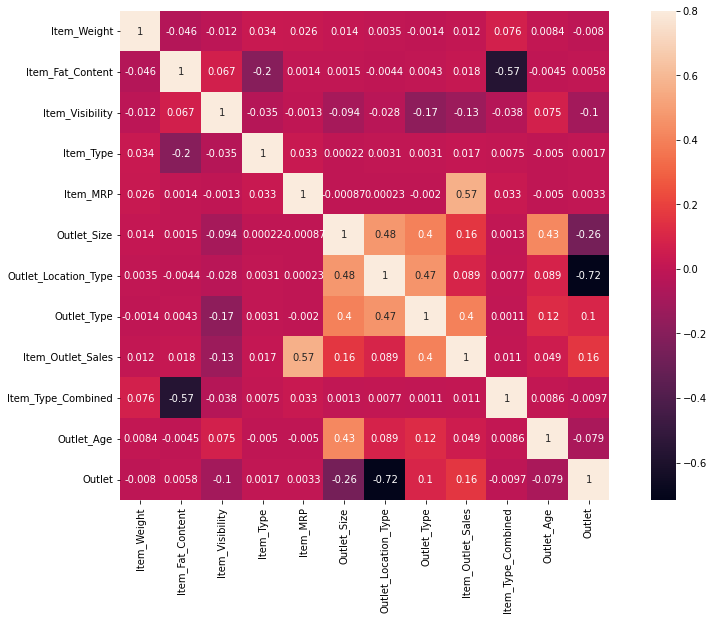

In [167]:
correl=df_train.corr()
ax=plt.subplots(figsize=(15,9))
sns.heatmap(correl,vmax=0.8,square=True, annot=True)

In [168]:
#sns.pairplot(df_train)

In [169]:
x_train = df_train.drop("Item_Outlet_Sales", axis=1)

In [170]:
y_train = np.log1p(df_train["Item_Outlet_Sales"])

In [171]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train,y_train)

In [172]:
reg.coef_

array([-1.17911152e-03,  1.95008569e-02, -1.35978363e+00,  3.38203148e-04,
        8.30124040e-03,  3.09033438e-01, -1.34954688e-01,  5.59009120e-01,
        1.20319618e-02, -2.28180152e-02,  6.14045499e-02])

In [173]:
reg.intercept_

5.90049998675353

In [174]:
reg.score(x_train, y_train)

0.5797573045987983

In [175]:
y_train_pred = reg.predict(x_train)

In [176]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.5797573045987983

In [177]:
df_test = pd.read_csv("https://raw.githubusercontent.com/naga-sk/DataScienceTraining-Assignments/main/hackathon2_big_mart/test_big_mart.csv")

In [178]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [179]:
fix_data(df_test)

In [180]:
df_test.loc[df_test.Item_Weight.isna()] = df_test.loc[df_test.Item_Weight.isna()].apply(fill_weight, axis=1)
df_test.set_index(["Item_Identifier", "Outlet_Identifier"], inplace=True)

In [181]:
y_test_pred = reg.predict(df_test)

In [189]:
df_test["Item_Outlet_Sales"] = np.expm1(y_test_pred)

In [190]:
df_test.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Age,Outlet,Item_Outlet_Sales
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.724373,1.162999,0.065684,7.233410,141.023273,0.546383,2.112832,1.201373,1.100158,24.171097,4.722760,1946.080386
std,4.252665,0.720556,0.051252,4.219057,61.809091,0.683048,0.812824,0.796740,0.522051,8.372256,2.837201,1490.705975
min,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1.000000,0.000000,0.000000,13.000000,0.000000,133.556979
25%,9.195000,1.000000,0.027047,4.000000,94.412000,0.000000,1.000000,1.000000,1.000000,18.000000,2.000000,901.245404
50%,12.867061,1.000000,0.054154,6.000000,141.415400,0.000000,2.000000,1.000000,1.000000,23.000000,5.000000,1528.113915
75%,15.850000,2.000000,0.093463,10.000000,186.026600,1.000000,3.000000,1.000000,1.000000,35.000000,7.000000,2540.505393
max,21.350000,2.000000,0.323637,15.000000,266.588400,2.000000,3.000000,3.000000,2.000000,37.000000,9.000000,9337.566565


In [184]:
df_test.loc[df_test["Item_Outlet_Sales"] < 0]

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Outlet_Age,Outlet,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,,,


In [192]:
df_test["Item_Outlet_Sales"].to_csv("bigmart_submission.csv")